## Question:  Who has the most significant relationships out of the Narrative Important Starks and Lannisters?


Before we tested Narrative Connections and Narrative Focus to find our 3 characters: Cersei , Tyrion & Jon. All 3 characters have a high level of scenes focused on them and a high number of characters they interact with. Now we will test for important relationships within and between each family to learn whom our characters have important relationships with. We will do this by visualizing using Networkx the relationships between the Stark family members , the Lannister family members , and last the relationships between each family. Networkx is a python module used for creating network graphs and finding out information about how the each node in the graph relates to each other

For our concern an important relationship is any relationship with a weight that is in the top 5% range of all the season's relationship weights.  The reason we are defining it like that is because we want to find relationships that include a high frequency of interactions and we want to calculate this frequency compared to other relationships in the same season.

Some terminology to keep in mind:

1. Nodes- The entities that are part of the relationship

2. Edges - The connection or relationship that is defined



In [11]:
#Load and inspect the first 5 rows of the edges for season 1
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
Lannisters = ['TYRION','TYWIN','CERSEI','JAIME']
Starks = ['NED', 'CATELYN', 'ROBB','JON','SANSA','ARYA']
Main_Char = Lannisters + Starks


S1 = pd.read_csv('gameofthrones/data/got-s1-edges.csv')


#Create a graph object and iterate throw the rows of the season 1 dataframe to add edges to graph
G_S1 = nx.Graph()

for _ , edge in S1.iterrows():
    G_S1.add_edge(edge['Source'], edge['Target'] , weight=edge['Weight'], season='1')
G_S1

----

### Apply  networking analysis to season 1
As you can see a network graph is a collection of nodes connected by edges whom in this case are weighted by the frequency of interactions. We are highlighting all relationships that satisfy our definition of importance in blue. For season 1 this means 3 specific relationships:

1. Robb and Catelyn
2. Cersei and Ned
3. Ned and Arya


Out of the 3 relationships only one includes a character we defined as narrative important--Cersei. Her most important relationship in season 1 was with Ned. This means that no matter how many other connections Ned and Cersei had in season 1 , only the connection between them was at a frequency high enough to be considered important. We will repeat this process for all 7 seasons and visualize them in one graph.


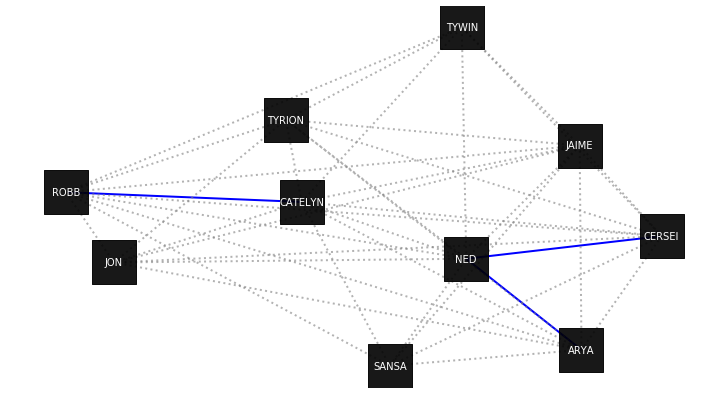

In [12]:
#Create a subgraph without characters that are not Lannisters/Starks
H = G_S1.subgraph(Main_Char)
#Create a function to check which family that characters interacting are from 
def checkInteract(s , t):
    if s in Starks and t in Starks:
        return 0
    elif s in Lannisters and t in Lannisters:
        return 1
    else:
        return 3
#Create a position layout for the graph    
pos = nx.spring_layout(H, scale=3)


#Create list of edge weights and find 95 percentile 
weights = np.array([(H[u][v]['weight']) for u,v in H.edges()])
p95 = np.floor(np.percentile(weights , 95))

#Plot figure
plt.figure(figsize=(12,7))
#Draw and style nodes 
nx.draw_networkx_nodes(H, pos, node_size=2000, node_shape='s', alpha=.9, node_color='black')
#Take all edges a sort them into elarge/emedium by if weight >= 95 percentile
elarge = [(u, v) for (u, v, d) in H.edges(data=True) if d['weight'] >=p95]
emedium = [(u, v) for (u, v, d) in H.edges(data=True) if d['weight'] <p95]
#Draw and style edge lines using elarge and emedium lists
nx.draw_networkx_edges(H, pos, edgelist=elarge,width=2 , alpha=1 , edge_color='b')
nx.draw_networkx_edges(H, pos, edgelist=emedium,width=2, alpha=.6, edge_color='grey', style='dotted')
#Draw and style node labels (character names)
nx.draw_networkx_labels(H, pos, font_size=10, font_color='w')
plt.axis('off')
plt.show()


## Stark vs Stark

In this graph only the important relationships are shown for all seasons, however, because the seasons are not guaranteed to contain a relationship that has an interaction amount in the top 5% range some seasons may be missing. 

The blue line shows us the flow of important(highly frequent) relationships in season 1. The first thing you notice is what every Stark but Jon is connected. This further emphasizes Jon's role as a loner that has no important relationships with his family in season 1. Another observation is how exactly the other Starks are connected by the blue line. Ned is connected only to Arya and Catelyn is connected only to Robb. So Ned does not interact to a high degree with Sansa or Robb, and Cateyln does not interact to a high degree with Arya or Sansa. Essentially this means Jon is not the only Stark ignored , every Stark parent has their favorite.

The gray line shows us the flow of important relationship in season 6. Once again the number of connections is only 1, which is Jon and Sansa. This can be explained as this is when in the story both character's story converges. The moment is also worth focusing on because it is the first time Jon ever connected on the graph with any other Stark, which symbolizes in the story Jon's growth from a black sheep to a part of the Stark herd. 

Lastly the yellow line shows us the flow of important (highly frequent) relationships in season 7. Now Arya has come home as well to interact with Sansa. It is important to note that neither Sansa nor Arya connect with Jon this season. Even though Jon by now is the main focus in the Starks , he still isolated from the Starks arc. From season 1 to season 7 , the narrative focus on the Starks transitions from Parent-Parent , to Parent-Child and eventually from Sibling-Sibling. As this transition happened the connections traveled slowly reaching Jon. However, even when they reached him , the story still treats him as 'not a real stark'.

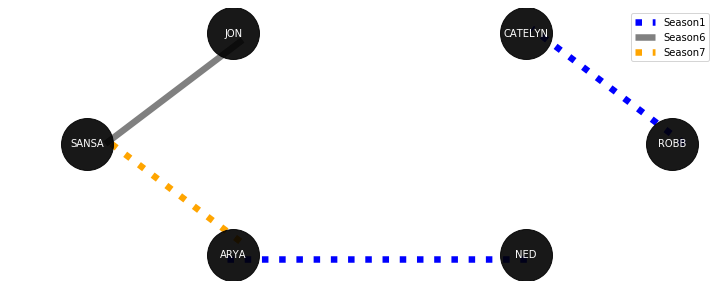

In [13]:
#Create list with seasons 1-7 edge csv files
Slist= ['gameofthrones/data/got-s1-edges.csv','gameofthrones/data/got-s2-edges.csv', 'gameofthrones/data/got-s3-edges.csv','gameofthrones/data/got-s4-edges.csv', 
 'gameofthrones/data/got-s5-edges.csv', 'gameofthrones/data/got-s6-edges.csv', 'gameofthrones/data/got-s7-edges.csv']
#Create default values for Glist (list of graphs) & s_num( season number)
Glist = []
s_num = 1
#Loop through seasons to create graph objects with edge data and append them to Glist
for season in Slist:
    S = pd.read_csv(season)
    G = nx.Graph()
    for _ , edge in S.iterrows():
        G.add_edge(edge['Source'], edge['Target'] , weight=edge['Weight'] , season=str(s_num))
    Glist.append(G)
    s_num+=1
#Create multi graph object for 7 graphs 
mg = nx.MultiGraph()
#Loop through graph objects and add data to multi graph object
for i in range(7):
    mg.add_weighted_edges_from(Glist[i].edges(data=True))

    
#Filter multi graph for Stark nodes , extract weights and assign 95 percentile
sub = mg.subgraph(Starks)
weights1to7 = np.array([(d['weight']['weight']) for u,v,d in sub.edges(data=True)])
p95 = np.floor(np.percentile(weights1to7 , 95))
#Create default values for Poslist(List of graph layout positions) and scale (scale of layout)
Poslist= []
scale=1
#Loop through layout posotions to create a list of different aligned positions
#We alter the scale so that we can see each line without them overlapping
for i in range(7):
    posN = nx.shell_layout(sub, scale=scale)
    Poslist.append(posN)
    scale-=.02
    
#Create plot figure
plt.figure(figsize=(12,5))
#Draw and style nodes & labels
nx.draw_networkx_nodes(sub, Poslist[2], node_size=2700, node_shape='o', alpha=.9, node_color='black')
nx.draw_networkx_labels(sub, Poslist[2], font_size=10, font_color='w')
#Loop through edges to find edges that are in the top 5% and assign them to a list
large=[]
for i in range(7):
        elarge = [(u, v) for (u, v, d) in sub.edges(data=True) if d['weight']['weight'] >=p95 and d['weight']['season']==str(i+1)]
        large.append(elarge)
#Create a list of colors and styles to loop through
cs = [('b','dotted'),('r','dotted') ,( 'g','dotted'), ('y','dashed'), ('pink','dashed') , ('grey','solid'),('orange','dotted')]
#Loop to draw and style edge lines
for i in range(7):
    nx.draw_networkx_edges(sub, Poslist[i], edgelist=large[i],width=6.5, alpha=1 ,label='Season'+str(i+1), edge_color=cs[i][0], style=cs[i][1])
plt.legend()
plt.axis('off')
plt.show()


## Lannister vs Lannister

The red line shows the important Lannister relationship for season 2. Which is Cersei and Tyrion. This is the season in which their rivalry really took off as they both manipulated the throne in Kings Landing. The purple line shows the important Lannister relationship for season 4. Which is Tyrion and Jaime. The yellow line shows the important Lannister relationship for season 7. This is between Jaime and Cersei. It is noticeable that unlike the Starks , all of the Lannisters except Tywin throughout the seasons connect through out the season creating a triangle of importance.

This is probably because all of the Lannisters are often in one place or are part of the same story thread. In either case , focusing on Cersei and Tyrion it seems like both have an equal amount of important relationships in the Lannister family. Neither have frequent relationships with their father and both have it with their brother.

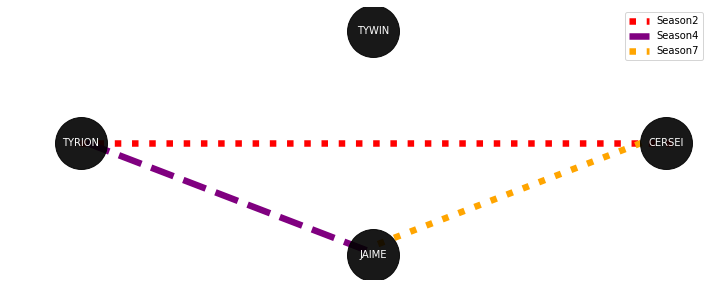

In [14]:
#Filter multi graph for Lannister nodes , extract weights and assign 95 percentile
sub2 = mg.subgraph(Lannisters)
weights2_1to7 = np.array([(d['weight']['weight']) for u,v,d in sub2.edges(data=True)])
p2_95 = np.floor(np.percentile(weights2_1to7 , 95))
#Create default values for Poslist(List of graph layout positions) and scale (scale of layout)
Poslist2= []
scale2=1
#Loop through layout posotions to create a list of different aligned positions
#We alter the scale so that we can see each line without them overlapping
for i in range(7):
    posN2 = nx.shell_layout(sub2, scale=scale2)
    Poslist2.append(posN2)
    scale2-=.02
#Create plot figure
plt.figure(figsize=(12,5))
#Draw and style nodes & labels
nx.draw_networkx_nodes(sub2, Poslist2[2], node_size=2700, node_shape='o', alpha=.9, node_color='black')
nx.draw_networkx_labels(sub2, Poslist2[2], font_size=10, font_color='w')
#Loop through edges to find edges that are in the top 5% and assign them to a list
large2=[]
for i in range(7):
        elarge2 = [(u, v) for (u, v, d) in sub2.edges(data=True) if d['weight']['weight'] >=p2_95 and d['weight']['season']==str(i+1)]
        large2.append(elarge2)
#Create a list of colors and styles to loop through
cs = [('b','dotted'),('r','dotted') ,( 'g','dotted'), ('purple','dashed'), ('pink','dashed') , ('grey','solid'),('orange','dotted')]
#Loop to draw and style edge lines
for i in range(7):
    nx.draw_networkx_edges(sub2, Poslist2[i], edgelist=large2[i],width=6.5, alpha=1 ,label='Season'+str(i+1), edge_color=cs[i][0], style=cs[i][1])
plt.legend()
plt.axis('off')
plt.show()


## Lannister vs Stark


Now let's look at solely the interactions for all 7 seasons that are between a Lannister and a Stark. Season 2 is Tywin with Arya. Last season 7 involves Tyrion and Jon. What this means is that only these 2 relationships have a weight frequency of interactions in the top 5% of all Lannister & Stark weighted interactions. As such even though Tyrion and Cersei are equal in important relationships in the Lannister family , Tyrion has important relationships outside the family too.


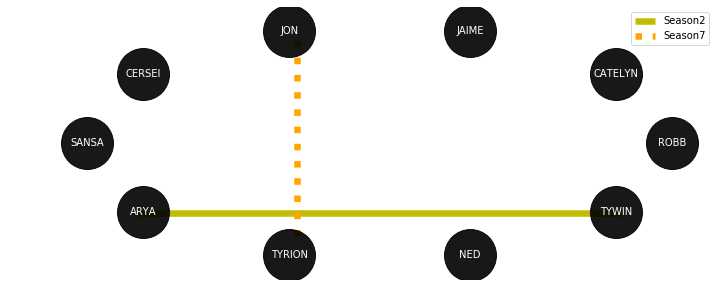

In [15]:
#Filter multi graph for Lannister nodes , extract weights and assign 95 percentile
sub3 = mg.subgraph(Main_Char)
weights3_1to7 = np.array([(d['weight']['weight']) for u,v,d in sub3.edges(data=True)])
p3_95 = np.floor(np.percentile(weights3_1to7 , 95))
#Create default values for Poslist(List of graph layout positions) and scale (scale of layout)
Poslist3= []
scale3=1
#Loop through layout posotions to create a list of different aligned positions
#We alter the scale so that we can see each line without them overlapping
for i in range(7):
    posN3 = nx.shell_layout(sub3, scale=scale3)
    Poslist3.append(posN3)
    scale3-=.02
#Create plot figure    
plt.figure(figsize=(12,5))
#Draw and style nodes & labels
nx.draw_networkx_nodes(sub3, Poslist3[2], node_size=2700, node_shape='o', alpha=.9, node_color='black')
nx.draw_networkx_labels(sub3, Poslist3[2], font_size=10, font_color='w')
#Loop through edges to find edges that are in the top 5% and assign them to a list
large3=[]
for i in range(7):
        elarge3 = [(u, v) for (u, v, d) in sub3.edges(data=True) if d['weight']['weight'] >=p3_95 and d['weight']['season']==str(i+1) and checkInteract(u,v)==3]
        large3.append(elarge3)
#Create a list of colors and styles to loop through        
cs = [('b','dotted'),('y','solid') ,( 'g','dashed'), ('purple','dotted'), ('pink','dashed') , ('grey','solid'),('orange','dotted')]
#Loop to draw and style edge lines
for i in range(7):
    nx.draw_networkx_edges(sub3, Poslist3[i], edgelist=large3[i],width=6.5, alpha=1 ,label='Season'+str(i+1), edge_color=cs[i][0], style=cs[i][1])
plt.legend()
plt.axis('off')
plt.show()


## Final Insight

Of the 3 most narrative important characters , analyzing the their important relationships gives the following insight:

1. Tyrion has important relationships inside the Lannister Family and outside with the Starks. He also has the most important relationships with 3 in total. 

2. Cersei has important relationships only inside the Lannister family. She has 2 important relationships in total.

3. Jon has important relationships inside the Stark Family and outside with the Lannisters. He has 2 important relationships in total.

Tyrion then is the character with the high narrative importance and the largest number of meaningful important relationships inside and outside his own family. 
